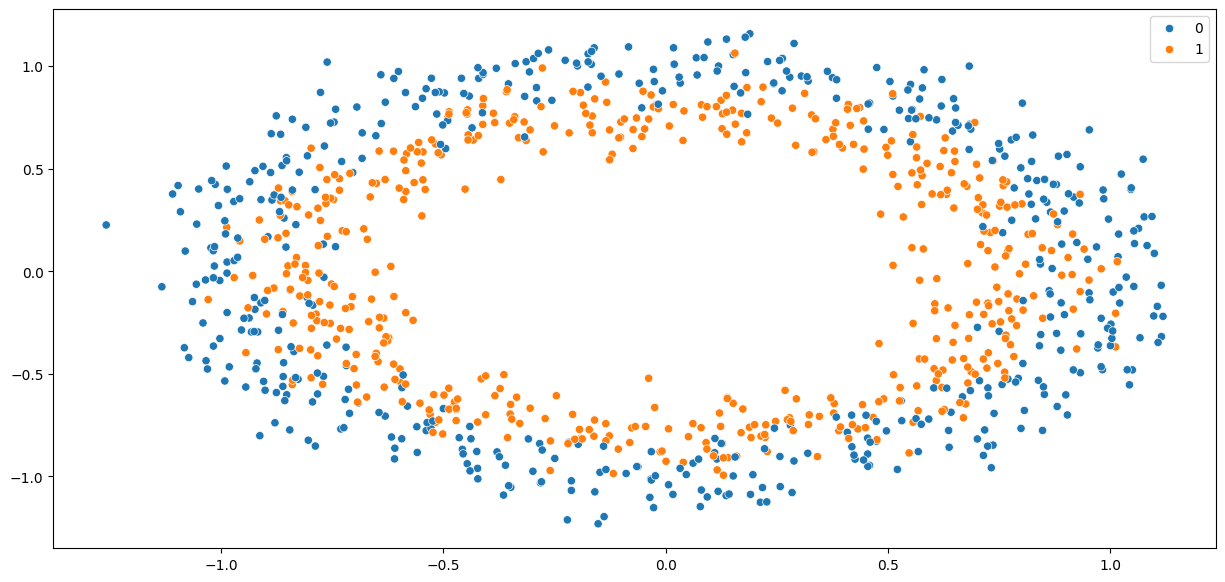

In [13]:
# Forming the dummy dataset for classification and visualizing it
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles

X, y = make_circles(
    n_samples=1000,
    noise=0.1,
    random_state=42
)

plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, :1].reshape(-1), y = X[:, 1].reshape(-1), hue=y)
plt.show()

In [14]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=4,
    max_features=0.75, # Node Level sampling|
    max_samples=0.75,
    bootstrap=True,
    oob_score=True,
    warm_start=False,
    verbose=1
)

rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       100
           1       0.69      0.83      0.75       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


### Key Concepts:
- **Bagging (Bootstrap Aggregating)**: This method involves training multiple base models (e.g., Decision Trees) on different bootstrap samples of the training data (i.e., sampling with replacement for instances). By default, Bagging does not include feature sampling; it uses all features for each tree unless specified otherwise.
- **Random Forest**: This is a specific type of Bagging that adds **node-level feature sampling**. At each node split in a Decision Tree, only a random subset of features is considered for finding the best split. This reduces variance and decorrelates the trees.
- **`max_features` in Decision Tree**: The `max_features` hyperparameter in a `DecisionTreeClassifier` (from scikit-learn) controls the number of features to consider when looking for the best split at each node. If set to a value less than the total number of features (e.g., `'sqrt'` or `'log2'`), it enables node-level feature sampling.

### How to Achieve Node-Level Sampling in Bagging:
- When you use a `BaggingClassifier` with base estimators of `DecisionTreeClassifier`, you can enable node-level feature sampling by setting the `max_features` parameter on the base Decision Tree itself. This means that for each tree in the ensemble, at every node, only a random subset of features is considered for splitting, just like in Random Forest.
- Example code:
  ```python
  from sklearn.ensemble import BaggingClassifier
  from sklearn.tree import DecisionTreeClassifier

  # Create a base Decision Tree with node-level feature sampling
  base_tree = DecisionTreeClassifier(max_features='sqrt')  # 'sqrt' means sqrt(n_features) per node

  # Create a Bagging classifier using this base tree
  bagging_clf = BaggingClassifier(
      base_estimator=base_tree,
      n_estimators=10,
      random_state=42
  )

  # Now, each tree in the bagging ensemble will perform node-level feature sampling
  ```
- In this case, the BaggingClassifier handles instance sampling (bootstrapping of data points), while the base Decision Tree handles node-level feature sampling via `max_features`. This combination effectively mimics the behavior of a Random Forest.

### Important Note:
- The `BaggingClassifier` also has its own `max_features` and `bootstrap_features` parameters, but these control **feature sampling at the tree level** (i.e., each tree is trained on a random subset of features for all nodes). This is different from node-level sampling. To achieve node-level sampling, you must set `max_features` on the base Decision Tree, not on the BaggingClassifier.

### Why This Works:
- By using `max_features` in the base Decision Tree, you introduce randomness at each node split, which decorrelates the trees in the ensemble. This reduces overfitting and improves generalization, similar to Random Forest. However, note that Random Forest may have additional optimizations (e.g., out-of-bag estimation by default), but the core mechanism of node-level sampling is achieved.

In summary, with the `max_features` hyperparameter in the base Decision Tree within a BaggingClassifier, you can enable node-level feature sampling, effectively creating a Random Forest-like model using Bagging.

In [16]:
# Bagging Classifier - Exactly like Random Forest with Node level sampling
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=4,
        max_features=0.75, # Enabling `Node Level` sampling through decision tree
        random_state=42,
    ),
    n_estimators=50,
    max_samples=0.75,
    max_features=1, # The `Node Level` sampling handled by decision tree alone
    bootstrap=True,
    oob_score=True,
    warm_start=False,
    verbose=1
)

bg.fit(X_train, y_train)
print(classification_report(y_test, bg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.55      0.63       100
           1       0.64      0.81      0.72       100

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.67       200
weighted avg       0.69      0.68      0.67       200



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished


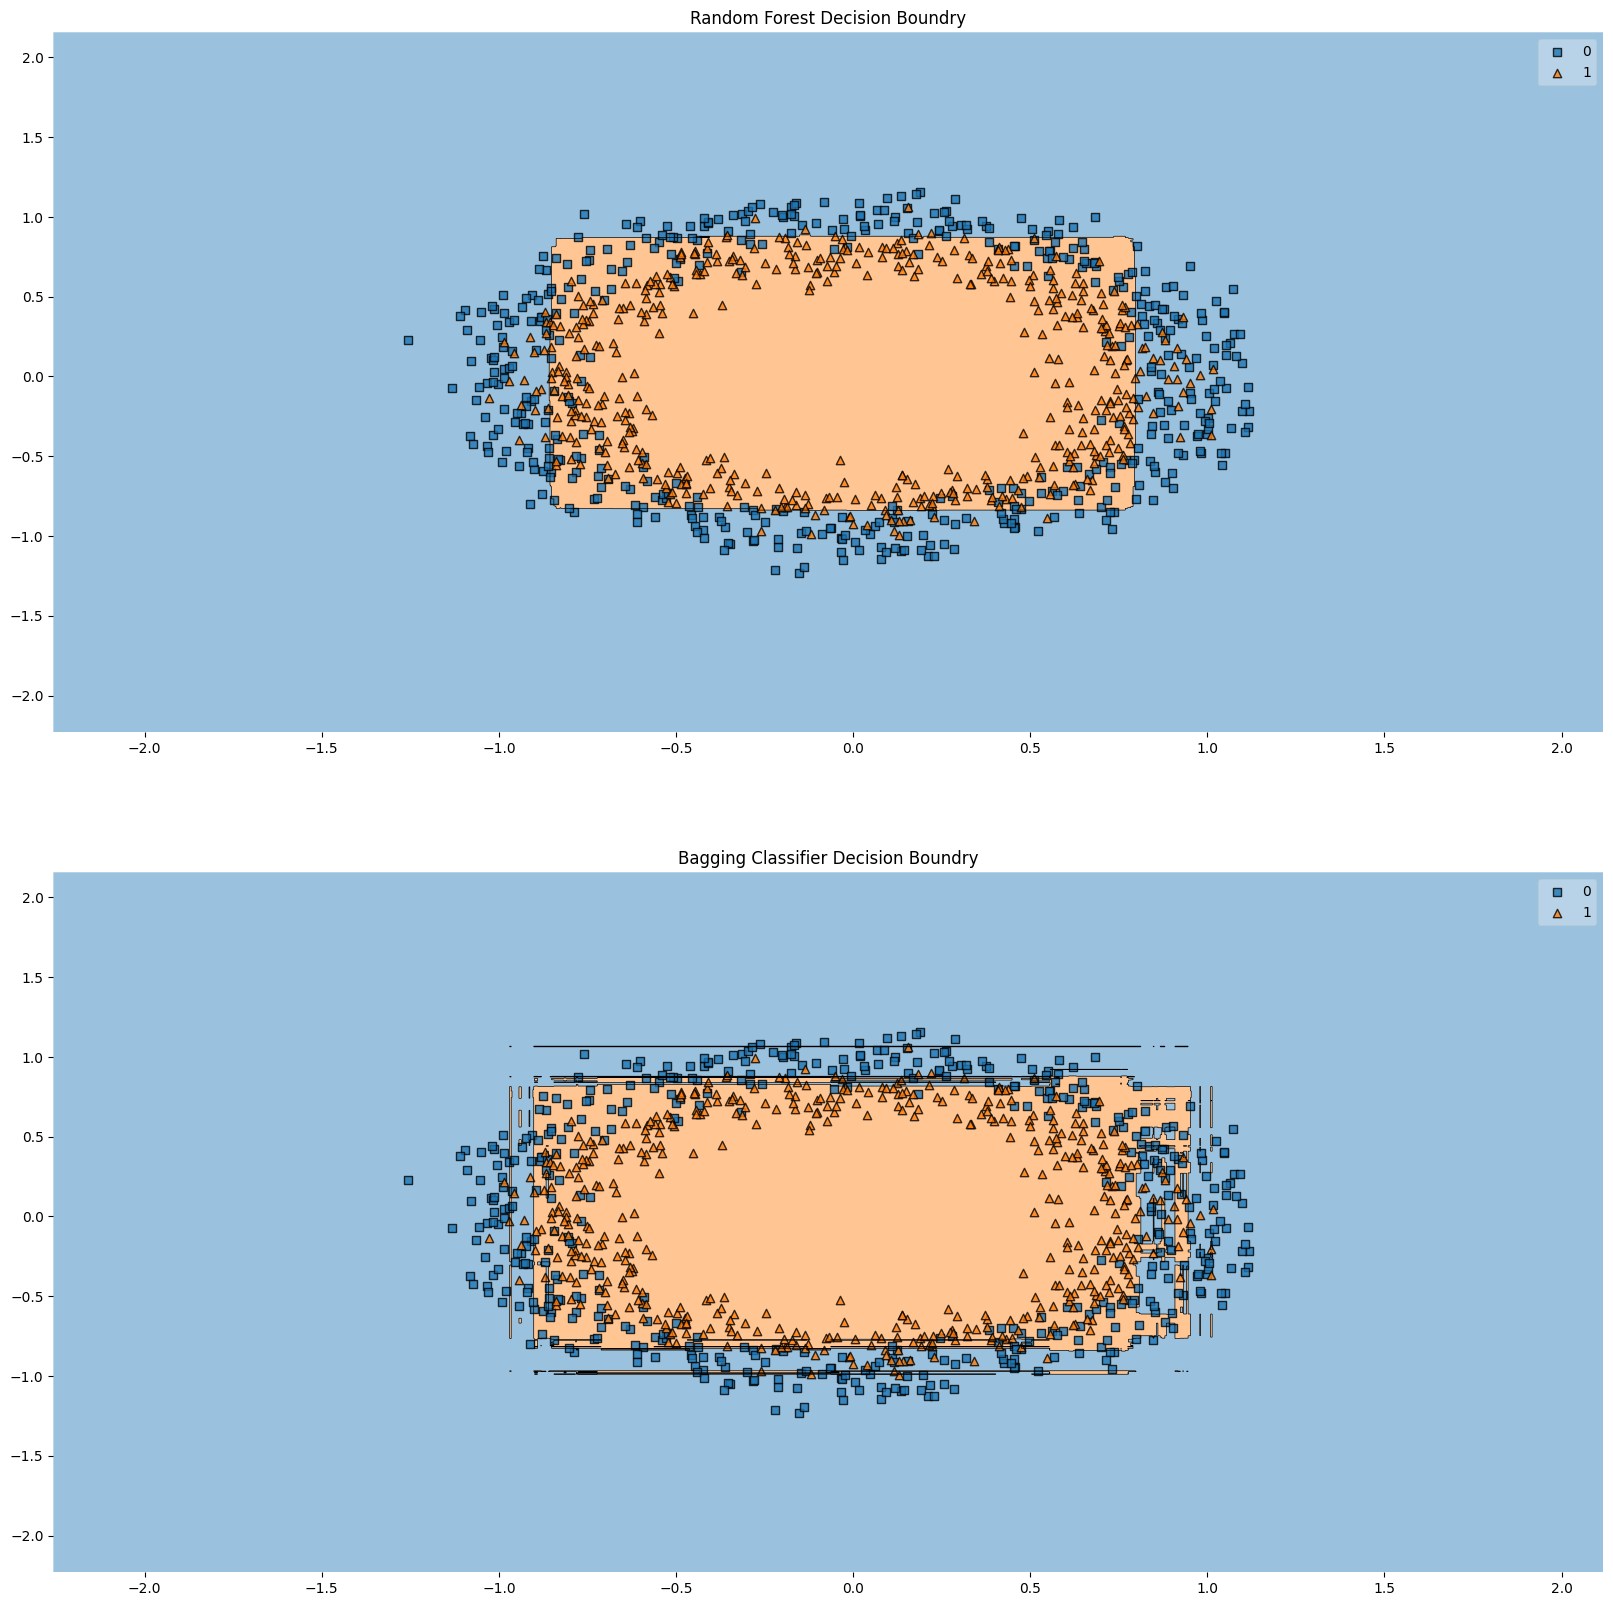

In [17]:
# Visualizing Decision Regions
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(2, 1, figsize=(20, 20))
for idx, model in enumerate([rf, bg]):
    plot_decision_regions(
        X, y, model, ax=ax[idx]
    )
    ax[idx].set_title(f"{"Random Forest" if idx==0 else "Bagging Classifier"} Decision Boundry")
plt.show()

> Despite both the models architecture and working being same, `Random Forest's` decision boundary seems quite clean but `Bagging Classifier's` decision boundary seems `overfitting`. It made some extra small decision regions for the outliers of brown class points.
